In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()
import seaborn as sns


In [85]:
#Download data set

df = pd.read_csv("application_train.csv")

In [86]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df.size

37516342

In [88]:
df.shape

(307511, 122)

In [89]:
df.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

Data Cleaning

In [90]:
# Calculate the percentage of NaN values in each column
nan_precentages = df.isna().mean() *100

# set a threshold for dropping columns ( 50% missing value)
threshold = 50


# Drop columns with >50% NAN values
columns_to_drop = nan_precentages[nan_precentages> threshold].index


for col in columns_to_drop:
    print(col)

print(len(columns_to_drop))

OWN_CAR_AGE
EXT_SOURCE_1
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
41


In [91]:
df_train_dropped  = df.drop(columns=columns_to_drop)

In [92]:
df_train_dropped.shape

(307511, 81)

In [93]:
#Check data types

print(df_train_dropped.dtypes.value_counts())

int64      41
float64    27
object     13
Name: count, dtype: int64


In [94]:
# Check for missing values

missing_value = df_train_dropped.isnull().sum()

missing_value = missing_value[missing_value > 0].sort_index(ascending=False)

missing_percent = missing_value / len(df_train_dropped) *100

threshold = 30

columns_to_drop2 = missing_percent[missing_percent > threshold].index

print(len(columns_to_drop))

41


In [95]:
# Drop columns with >50% missing values
df_cleaned = df_train_dropped.drop(columns=columns_to_drop2)

print(df_cleaned.shape)

(307511, 72)


In [96]:
print(df_cleaned.dtypes.value_counts())

int64      41
float64    20
object     11
Name: count, dtype: int64


TARGET
0    282686
1     24825
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

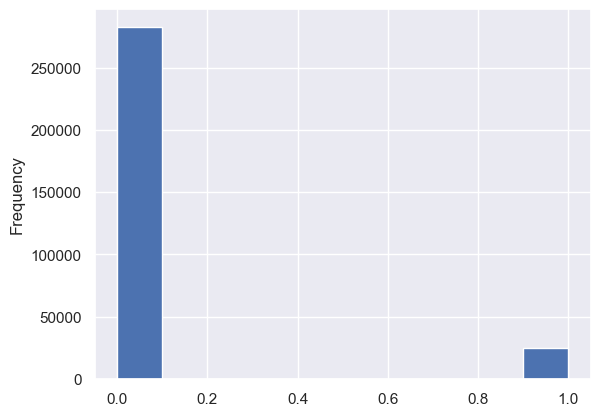

In [97]:
print(df_cleaned["TARGET"].value_counts())
df_cleaned["TARGET"].astype(int).plot.hist()

Correlation matrix

In [98]:
# Compute the correlation matrix using only numeric columns

numerical = df_cleaned.corr(numeric_only=True)


target_corr = numerical["TARGET"]

target_corr_abs = target_corr.abs()

target_corr_abs = target_corr_abs.drop("TARGET")

best_correlation = target_corr_abs.sort_values(ascending=False)

print(best_correlation)


EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
REGION_POPULATION_RELATIVE     0.037227
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
AMT_CREDIT                     0.030369
FLAG_DOCUMENT_6                0.028602
FLAG_WORK_PHONE                0.028524
HOUR_APPR_PROCESS_START        0.024166
FLAG_PHONE                     0.023806
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187


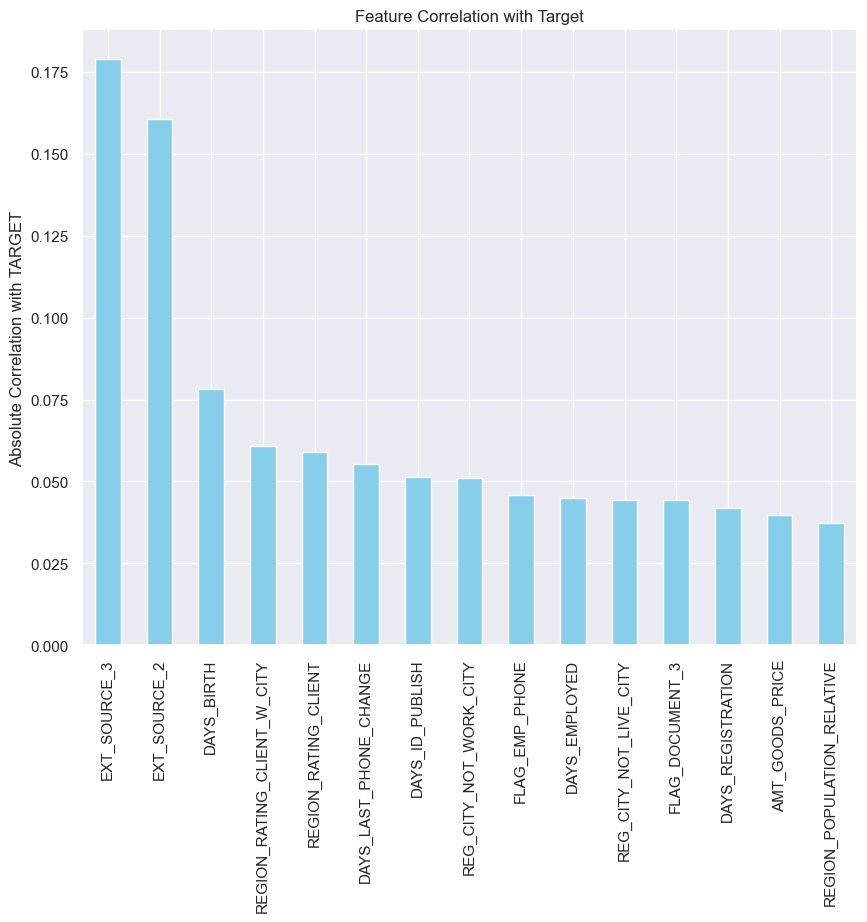

In [99]:
# Plot a bar chart showing the correlation strength of top features with the target
import matplotlib.pyplot as plt

best_correlation.head(15).plot(kind='bar', figsize=(10,8), color='skyblue',)
plt.ylabel('Absolute Correlation with TARGET')
plt.title('Feature Correlation with Target')
plt.show()


Anomoly handling

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


Text(0.5, 0, "Days Employment'")

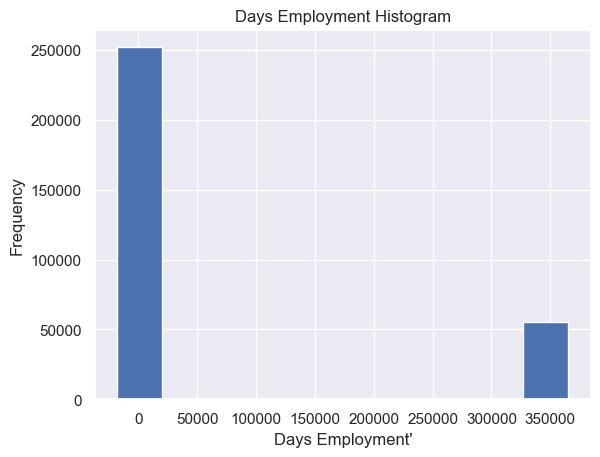

In [100]:
print(df_cleaned["DAYS_EMPLOYED"].describe())

df_cleaned["DAYS_EMPLOYED"].plot.hist(title='Days Employment Histogram')
plt.xlabel("Days Employment'") 


Text(0.5, 0, 'Days Employment')

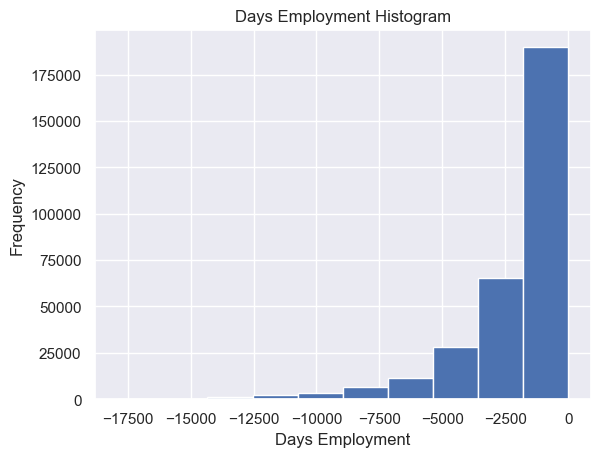

In [101]:
# Replace placeholder with NaN, add flag for employment, fill missing with 0

df_cleaned['DAYS_EMPLOYED'] = df_cleaned['DAYS_EMPLOYED'].replace(365243, np.nan)

df_cleaned["IS_EMPLOYED"]  =  df_cleaned["DAYS_EMPLOYED"].notna().astype(int)

df_cleaned["DAYS_EMPLOYED"] =  df_cleaned["DAYS_EMPLOYED"].fillna(0)

df_cleaned["IS_EMPLOYED"] = df_cleaned["IS_EMPLOYED"].astype('int64')


df_cleaned['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [102]:

x = df_cleaned.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = df_cleaned["TARGET"]

In [103]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , random_state=42 , stratify=y)


In [104]:
print(x_train.columns)
print(x_test.columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCL

In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(246008, 71)
(61503, 71)
(246008,)
(61503,)


data preprocessing


In [106]:
df_cleaned.size

22448303

In [107]:
df_cleaned.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,IS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [108]:
df_cleaned.dtypes.value_counts()

int64      41
float64    21
object     11
Name: count, dtype: int64

In [109]:
# Check categorical columns and their value counts
object_columns = df_cleaned.select_dtypes("object").columns.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [110]:
df_cleaned["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [111]:
# Reduce categories by grouping rare ones
counts = df_cleaned["ORGANIZATION_TYPE"].value_counts()

rare = counts[counts < 1000].index

df_cleaned["ORGANIZATION_TYPE"] = df_cleaned["ORGANIZATION_TYPE"].replace(rare,"else")

In [112]:
#now 34 unique categories left

uni = df_cleaned["ORGANIZATION_TYPE"].unique()

len(uni)

34

In [113]:
# Create a preprocessing pipeline to handle missing values and encode categorical features

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer


df_num = x.select_dtypes(include= ["float64","int64"]).columns.tolist()

df_cat = x.select_dtypes(include= ["object"]).columns.tolist()


ordinal_pipeline = make_pipeline (


    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="mean")
)

preprocessing = ColumnTransformer([


    ("num_data", num_pipeline , df_num),
    ("cat_data",ordinal_pipeline, df_cat)


])


Feature Selection and Model training

In [114]:
# Using RandomForestClassifier to identify the most important features for prediction.

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


random_pipeline = make_pipeline(

    preprocessing,
    RandomForestClassifier(class_weight='balanced',n_estimators=250, max_depth=25,min_samples_leaf=6,min_samples_split=13,max_features="sqrt",random_state=42, bootstrap=True,n_jobs=-1)
)   

random_pipeline.fit(x_train,y_train)
    
    

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_data',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'FLAG_MOBIL',
                                                   'FLAG_EMP_PHONE',
                                                   'FLAG_WORK_...
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=25,
                                        min_samples_leaf=6,
                                        min_samples_split=13, n_estimators=250,
                                        n_jobs=-1, random_state=42))])

In [115]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

random_pipeline.fit(x_train, y_train)
y_pre = random_pipeline.predict(x_train)

cm = confusion_matrix(y_train, y_pre)
print(cm)

[[222891   3257]
 [   827  19033]]


In [ ]:
# Show the 20 most important features in the data.
feature_names = preprocessing.get_feature_names_out()

importances = random_pipeline.named_steps['randomforestclassifier'].feature_importances_

feature_importance = pd.Series(importances, index=feature_names)


feature_importance = feature_importance.sort_values(ascending=False)

print("Top 20 Features:\n")
print(feature_importance.head(20))

Top 20 Features:

num_data__EXT_SOURCE_3                  0.114000
num_data__EXT_SOURCE_2                  0.111867
num_data__DAYS_BIRTH                    0.057275
num_data__DAYS_EMPLOYED                 0.051004
num_data__DAYS_ID_PUBLISH               0.049947
num_data__DAYS_LAST_PHONE_CHANGE        0.049267
num_data__AMT_ANNUITY                   0.048751
num_data__DAYS_REGISTRATION             0.048407
num_data__AMT_CREDIT                    0.046282
num_data__AMT_GOODS_PRICE               0.041457
num_data__REGION_POPULATION_RELATIVE    0.038436
num_data__AMT_INCOME_TOTAL              0.034682
num_data__HOUR_APPR_PROCESS_START       0.028862
cat_data__ORGANIZATION_TYPE             0.026048
cat_data__WEEKDAY_APPR_PROCESS_START    0.021580
num_data__AMT_REQ_CREDIT_BUREAU_YEAR    0.019963
num_data__OBS_30_CNT_SOCIAL_CIRCLE      0.015697
cat_data__NAME_EDUCATION_TYPE           0.015575
num_data__OBS_60_CNT_SOCIAL_CIRCLE      0.015545
cat_data__NAME_FAMILY_STATUS            0.011126
dt

In [ ]:
# Evaluate model performance on training data using common classification metrics.

from sklearn.metrics import recall_score, f1_score, accuracy_score , precision_score


accuracy = accuracy_score(y_train , y_pre)

precision = precision_score(y_train , y_pre)

recall =  recall_score(y_train , y_pre)

f1 =  f1_score(y_train , y_pre)

print(accuracy)

print(precision)

print(recall)

print(f1)

0.9833989138564599
0.8538806639748766
0.9583585095669688
0.9031079478054567


In [118]:
y_scores = random_pipeline.predict_proba(x_train)[:, 1]


In [ ]:
# Get precision and recall values for different decision thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


In [120]:
print(thresholds.min(), thresholds.max())

0.0033759019400164763 0.9050058374018337


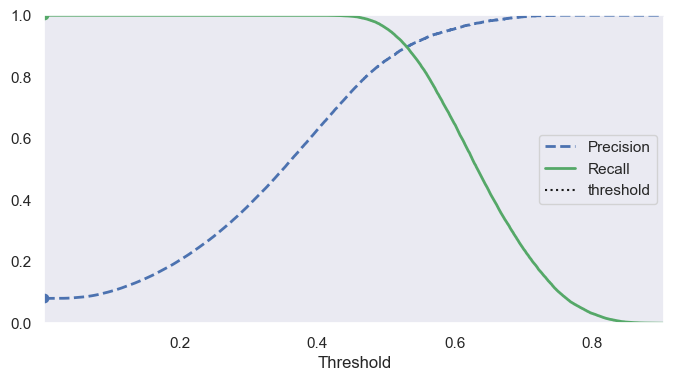

In [ ]:
plt.figure(figsize=(8, 4))  
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# this section just beautifies 
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis(plt.axis([thresholds.min(), thresholds.max(), 0, 1])
)
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")


plt.show()

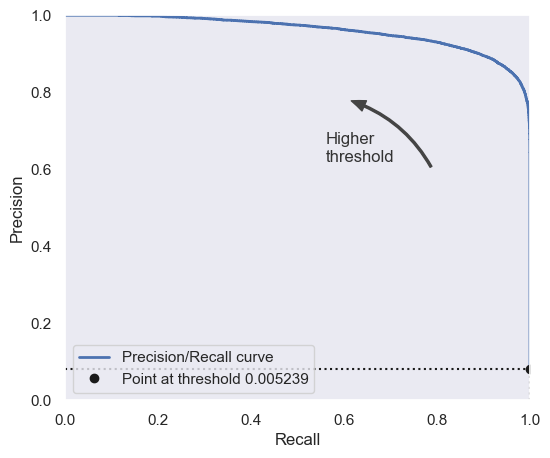

In [ ]:
import matplotlib.patches as patches  # – for the curved arrow

plt.figure(figsize=(6, 5))  # 

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# just beautifies
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 0.005239")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


plt.show()

In [ ]:
# Find the threshold where precision reaches 89%
idx_for_80_precision = (precisions >= 0.89).argmax()
threshold_for_80_precision = thresholds[idx_for_80_precision]
threshold_for_80_precision

0.4707583641826607

In [136]:
y_train_pred_80 = (y_scores >= threshold_for_80_precision)

In [138]:
accuracy = accuracy_score(y_train , y_train_pred_80)

precision = precision_score(y_train , y_train_pred_80)

recall =  recall_score(y_train , y_train_pred_80)

f1 =  f1_score(y_train , y_train_pred_80)

print(accuracy)

print(precision)

print(recall)

print(f1)

0.9791185652499106
0.8000163019113992
0.9884189325276939
0.8842939838277362


In [139]:

cm = confusion_matrix(y_train, y_train_pred_80)
print(cm)


[[221241   4907]
 [   230  19630]]


Testing 

In [140]:
random_pipeline.fit(x_test,y_test)

y_test_pre = random_pipeline.predict(x_test)

In [141]:

accuracy = accuracy_score(y_test , y_test_pre)

precision = precision_score(y_test , y_test_pre)

recall =  recall_score(y_test , y_test_pre)

f1 =  f1_score(y_test , y_test_pre)

print(accuracy)

print(precision)

print(recall)

print(f1)

0.9909597905793214
0.9172818474351694
0.9760322255790533
0.9457455113192819


In [ ]:
cm = confusion_matrix(y_test, y_test_pre)
print(cm)

[[56101   437]
 [  119  4846]]
